In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the concatenated dataset
data_path = 'concatenated_with_host_status.csv'
df = pd.read_csv(data_path)

# Sort the data by Year to preserve the time-series nature
df.sort_values(by='Year', inplace=True)

# Create the 'Previous_Total_Medal_Count' feature by shifting the 'Total_Medal_Count' column
df['Previous_Total_Medal_Count'] = df.groupby('NOC')['Total_Medal_Count'].shift(1)

# Drop rows where 'Previous_Total_Medal_Count' is NaN (e.g., the first year for each NOC)
df.dropna(subset=['Previous_Total_Medal_Count'], inplace=True)

# Split the data into training (first 80%) and testing (last 20%)
split_index = int(len(df) * 0.8)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

# Define features and target
features = ['Total_Athletes', 'Previous_Total_Medal_Count', 'host_status']
X_train = train_df[features]
y_train = train_df['Total_Medal_Count']
X_test = test_df[features]
y_test = test_df['Total_Medal_Count']

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display first few predictions alongside actual values
test_df['Predicted_Total_Medal_Count'] = y_pred
test_df[['Year', 'NOC', 'Total_Medal_Count', 'Predicted_Total_Medal_Count']].head()


Mean Squared Error: 36.72
R-squared: 0.79


/tmp/ipykernel_16027/1427289127.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Total_Medal_Count'] = y_pred


,Year,NOC,Total_Medal_Count,Predicted_Total_Medal_Count
5164,2004,Netherlands Antilles,0,-0.276016
5165,2004,Netherlands,0,-0.607078
5166,2004,New Zealand,5,16.528226
5167,2004,New Zealand,0,-0.607078
5168,2004,Niger,0,-0.165662


/tmp/ipykernel_16027/1572567197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Total_Medal_Count'] = y_pred
/tmp/ipykernel_16027/1572567197.py:40: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


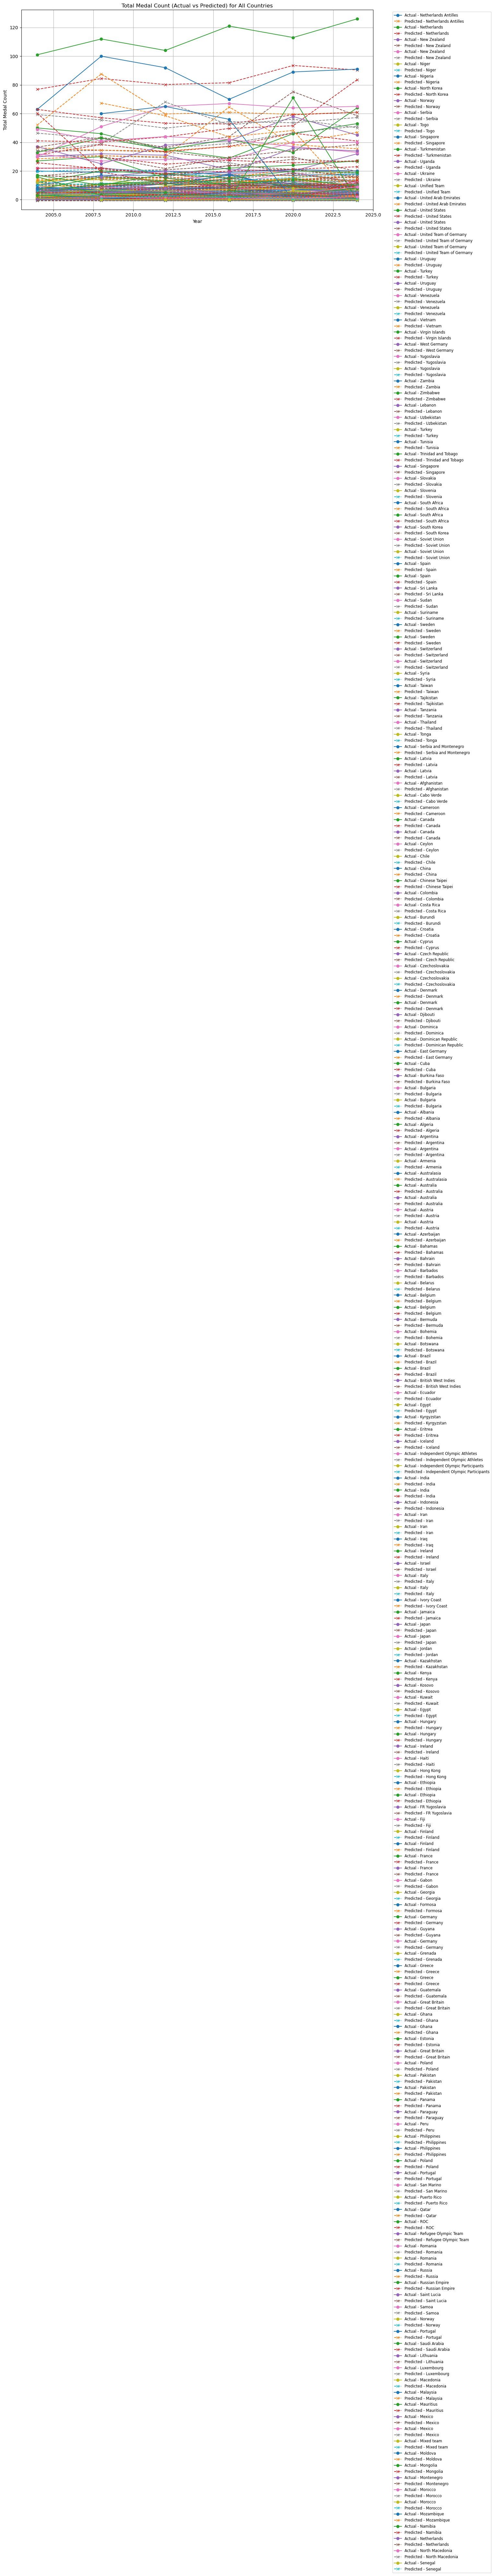

In [3]:
import matplotlib.pyplot as plt

# Ensure test_df has predictions and relevant columns
test_df['Predicted_Total_Medal_Count'] = y_pred

# Create a figure
plt.figure(figsize=(14, 8))

# Get the unique NOCs in the test set
unique_nocs = test_df['NOC'].unique()

# Loop through each NOC and plot on the same graph
for noc in unique_nocs:
    # Filter data for the current NOC
    actual_data = test_df[test_df['NOC'] == noc]

    # Plot actual Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Total_Medal_Count'],
        marker='o',
        label=f'Actual - {noc}'
    )

    # Plot predicted Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Predicted_Total_Medal_Count'],
        marker='x',
        linestyle='--',
        label=f'Predicted - {noc}'
    )

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.title('Total Medal Count (Actual vs Predicted) for All Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_16027/4036511570.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Total_Medal_Count'] = y_pred


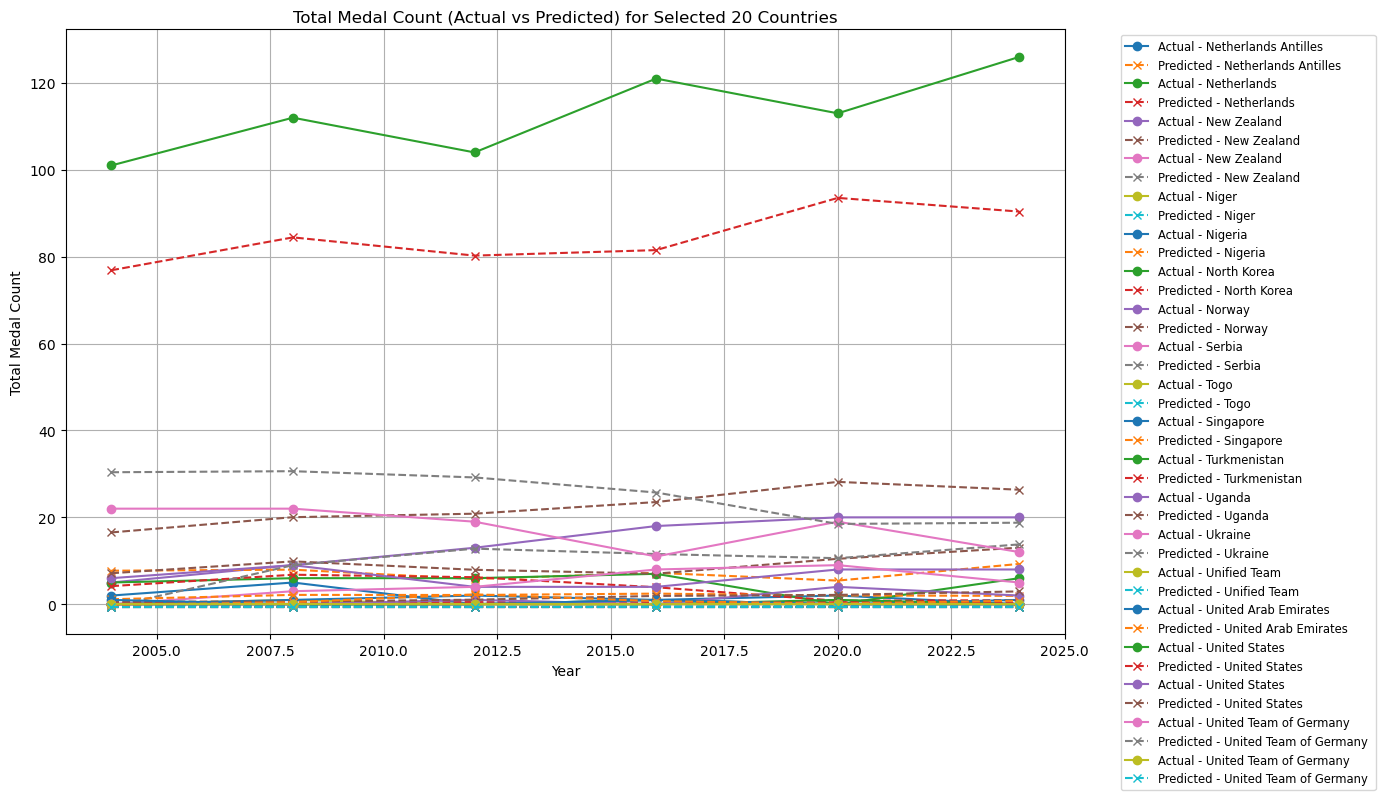

In [4]:
import matplotlib.pyplot as plt

# Ensure test_df has predictions and relevant columns
test_df['Predicted_Total_Medal_Count'] = y_pred

# Get the first 20 unique NOCs from the test set
selected_nocs = test_df['NOC'].unique()[:20]

# Create a figure
plt.figure(figsize=(14, 8))

# Loop through the selected NOCs and plot their data
for noc in selected_nocs:
    # Filter data for the current NOC
    actual_data = test_df[test_df['NOC'] == noc]

    # Plot actual Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Total_Medal_Count'],
        marker='o',
        label=f'Actual - {noc}'
    )

    # Plot predicted Total Medal Count
    plt.plot(
        actual_data['Year'],
        actual_data['Predicted_Total_Medal_Count'],
        marker='x',
        linestyle='--',
        label=f'Predicted - {noc}'
    )

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Medal Count')
plt.title('Total Medal Count (Actual vs Predicted) for Selected 20 Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')  # Place the legend outside the plot
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
